### Import Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Car sales dataset

In [2]:
np.random.seed(42)

n = 100
data = pd.DataFrame({
    "Car_Model": np.random.choice(["Sedan", "SUV", "Hatchback", "Coupe", "Truck"], n),
    "Price": np.random.randint(10000, 70000, n),
    "Sale_Date": pd.date_range(start="2022-01-01", periods=n, freq="D"),
    "Customer_Age": np.random.randint(20, 65, n),
    "Region": np.random.choice(["North", "South", "East", "West"], n),
    "Customer_Type": np.random.choice(["New", "Returning"], n)
})

### Set a Custom Seaborn Theme

In [3]:
sns.set_theme(style="darkgrid", palette="coolwarm")

### Examine the Data

In [4]:
print(data.head())
print(data.isnull().sum()) 

   Car_Model  Price  Sale_Date  Customer_Age Region Customer_Type
0      Coupe  62251 2022-01-01            63   West     Returning
1      Truck  32662 2022-01-02            43  South     Returning
2  Hatchback  18392 2022-01-03            34  South     Returning
3      Truck  40535 2022-01-04            51  South           New
4      Truck  23067 2022-01-05            51  South     Returning
Car_Model        0
Price            0
Sale_Date        0
Customer_Age     0
Region           0
Customer_Type    0
dtype: int64


### Customize Figure Size for Bar Plots (Car sales by model)

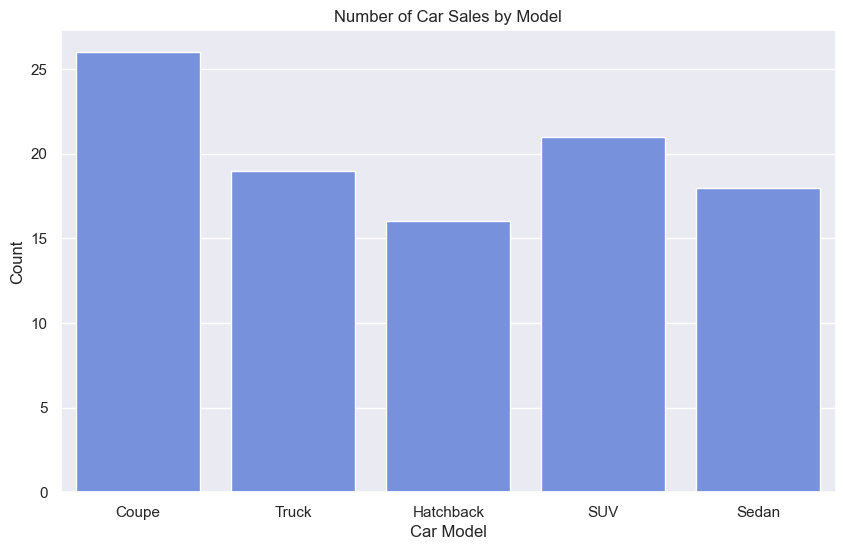

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Car_Model", data=data)
plt.title("Number of Car Sales by Model")
plt.xlabel("Car Model")
plt.ylabel("Count")
plt.show()

### Distribution Plot for Car Prices

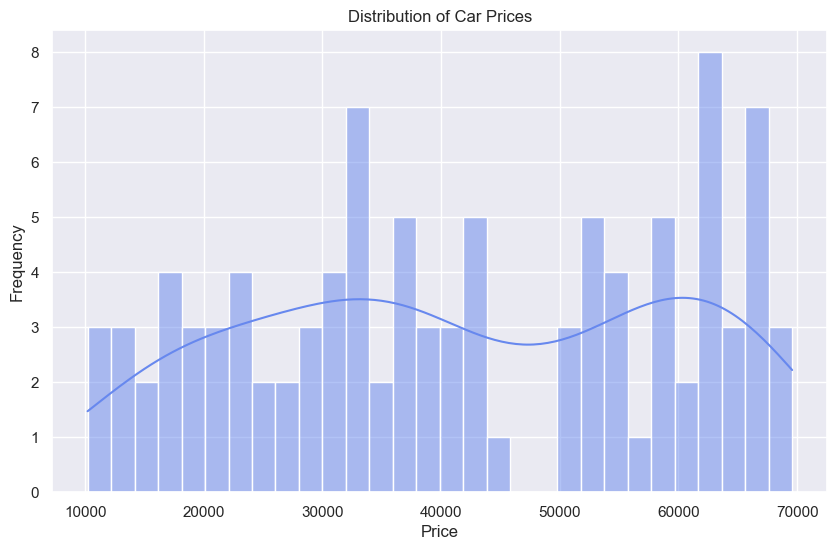

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data["Price"], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

### FacetGrid for Region-wise Car Sales Analysis

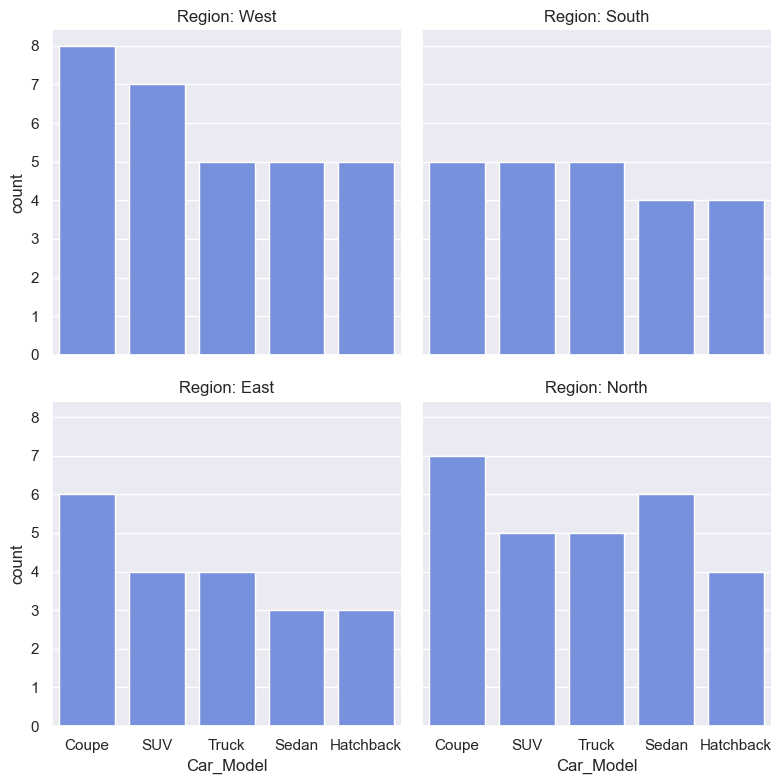

In [7]:
g = sns.FacetGrid(data, col="Region", col_wrap=2, height=4)
g.map(sns.countplot, "Car_Model", order=data["Car_Model"].value_counts().index)
g.set_titles("Region: {col_name}")
plt.show()

### Scatter Plot for Car Price vs Customer Age

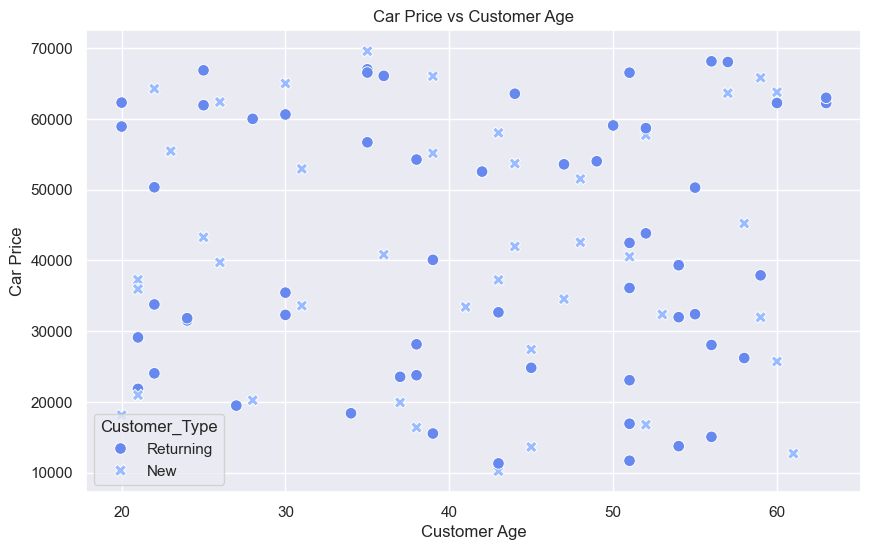

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Customer_Age", y="Price",
    hue="Customer_Type", style="Customer_Type",
    data=data, s=70
)
plt.title("Car Price vs Customer Age")
plt.xlabel("Customer Age")
plt.ylabel("Car Price")
plt.show()

### Box Plot for Car Sales by Region and Customer Age

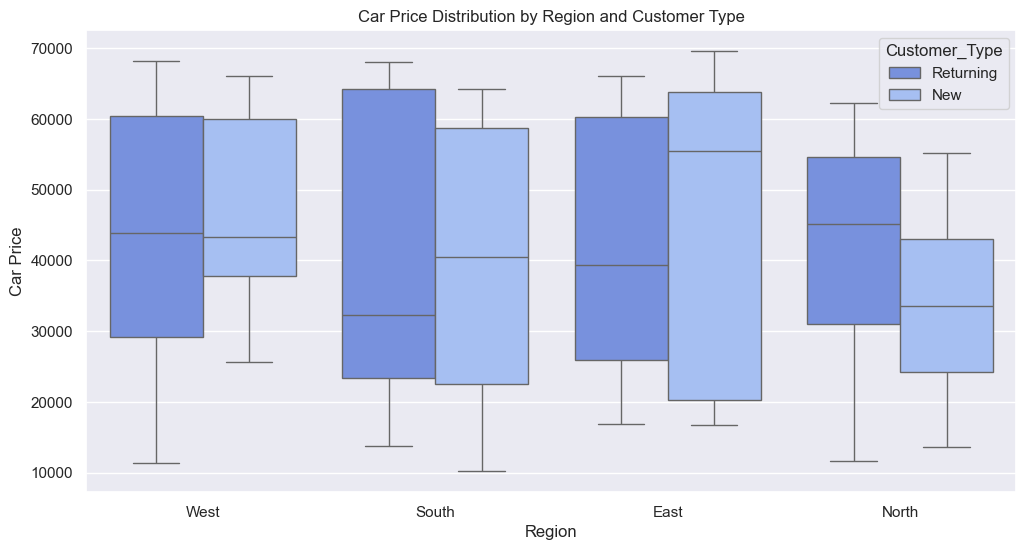

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Region", y="Price", hue="Customer_Type", data=data)
plt.title("Car Price Distribution by Region and Customer Type")
plt.xlabel("Region")
plt.ylabel("Car Price")
plt.show()

###  Multi-Panel Plot (Sales Trends Over Time per Region)

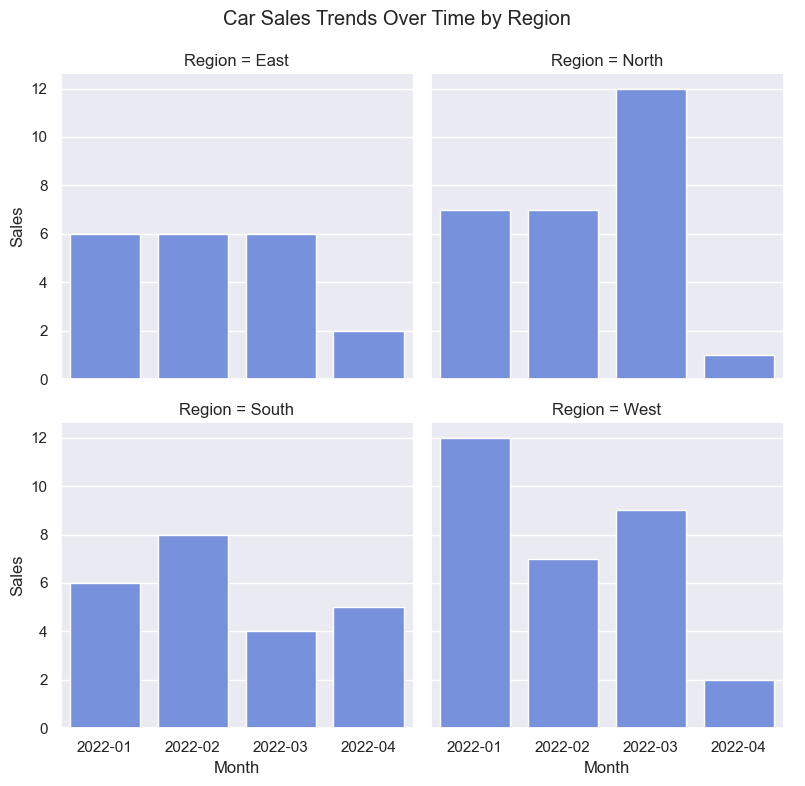

In [15]:
data["Month"] = data["Sale_Date"].dt.to_period("M").astype(str)
sales_per_month = data.groupby(["Month", "Region"]).size().reset_index(name="Sales")

g = sns.catplot(
    x="Month", y="Sales", col="Region",
    data=sales_per_month, kind="bar", col_wrap=2, height=4
)
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Car Sales Trends Over Time by Region")
plt.show()

### Customize Color Palette

In [16]:
sns.set_palette("Set2")

### Add Annotations to Scatter Plot

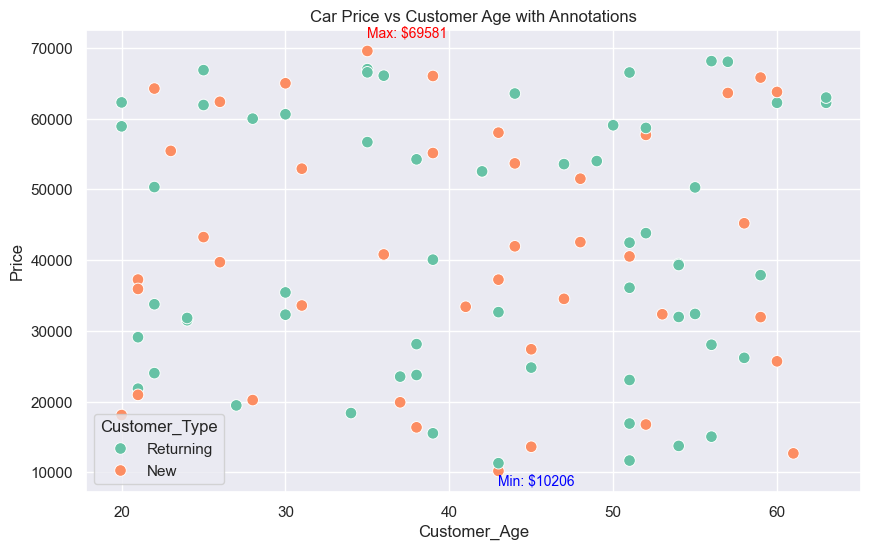

In [17]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x="Customer_Age", y="Price",
    hue="Customer_Type", data=data, s=70
)
plt.title("Car Price vs Customer Age with Annotations")

# Find max and min price points
max_price = data.loc[data["Price"].idxmax()]
min_price = data.loc[data["Price"].idxmin()]

plt.text(max_price["Customer_Age"], max_price["Price"]+2000,
         f"Max: ${max_price['Price']}", color="red", fontsize=10)
plt.text(min_price["Customer_Age"], min_price["Price"]-2000,
         f"Min: ${min_price['Price']}", color="blue", fontsize=10)

plt.show()

### Save Plots to PNG and SVG

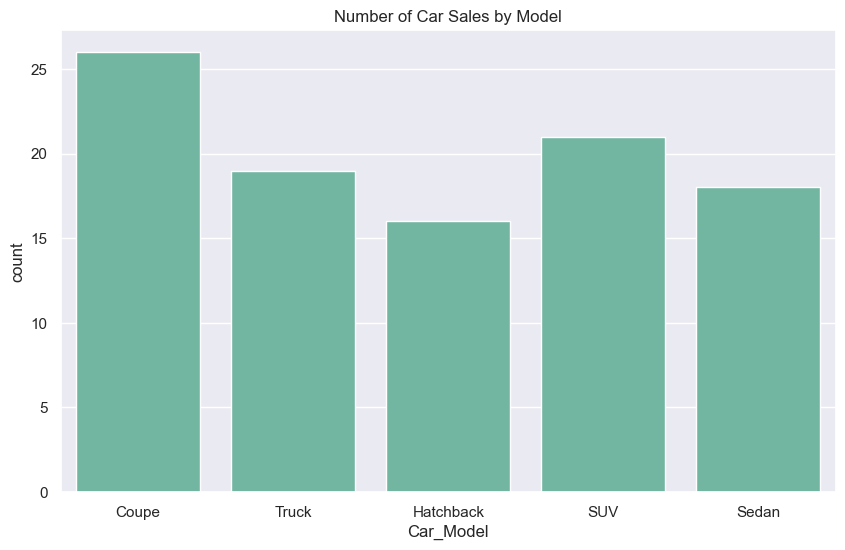

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Car_Model", data=data)
plt.title("Number of Car Sales by Model")
plt.savefig("car_sales_by_model.png", dpi=300, bbox_inches="tight")
plt.savefig("car_sales_by_model.svg", dpi=300, bbox_inches="tight")
plt.show()

### Combined Plot - Heatmap of Correlations

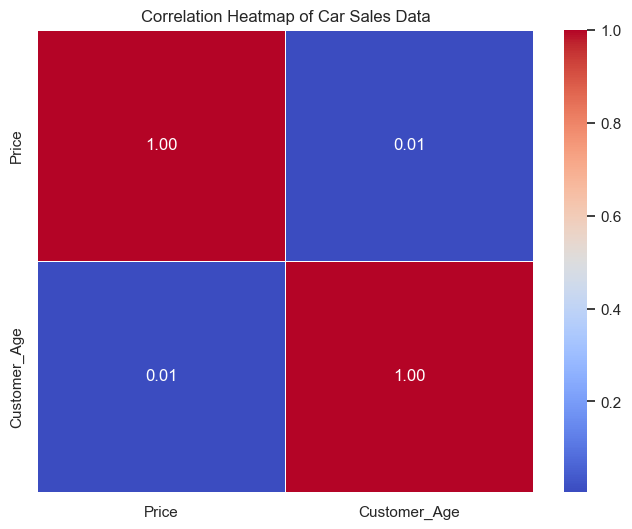

In [20]:
plt.figure(figsize=(8, 6))
corr = data[["Price", "Customer_Age"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Car Sales Data")
plt.show()